# 任务一：提取音频特征
本任务的目标是从音频文件中提取特征，绘制特征图，并将其保存为`numpy`数组。我们将使用`librosa`库来处理音频数据。
需要提取的特征包括：
- **MFCC**（梅尔频率倒谱系数）
- **Chroma**（色度特征）
- **Mel**（梅尔频谱）
- **STFT**（短时傅里叶变换）

In [32]:
# TODO import necessary libraries
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# TODO 读取音频文件
# 音频文件路径为 `./data/sample_recording.wav`
audio_path = './data/sample_recording.wav'
# 读取音频文件，转换为16kHz采样率的单声道音频
audio, sr = librosa.load(audio_path, sr=16000, mono=True)

In [34]:
# TODO 定义特征提取函数
def extract_features(audio, sr):
    # 提取 MFCC 特征
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    # 提取 Chroma 特征
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
    # 提取 Mel 频谱特征
    mel = librosa.feature.melspectrogram(y=audio, sr=sr)
    
    # 提取 STFT 特征
    stft = np.abs(librosa.stft(audio))
    
    return mfccs, chroma, mel, stft

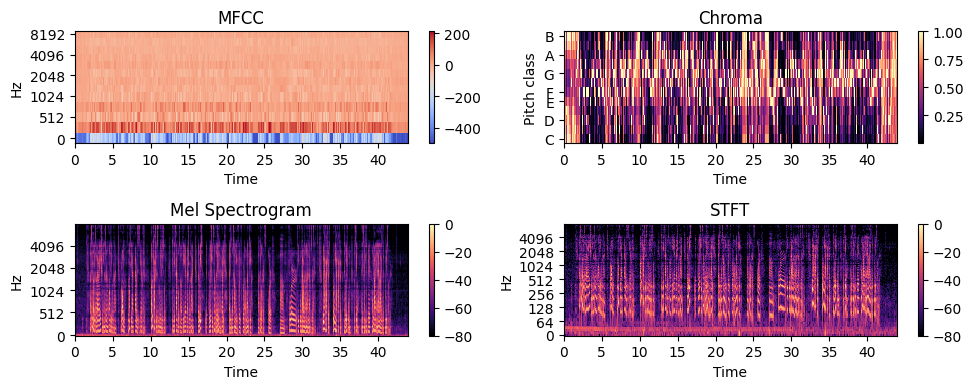

In [35]:
# TODO: 提取特征并绘制特征图
mfccs, chroma, mel, stft = extract_features(audio, sr)
# 绘制 MFCC 特征图
plt.figure(figsize=(10, 4))
plt.subplot(2, 2, 1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar()
plt.title('MFCC')
# 绘制 Chroma 特征图
plt.subplot(2, 2, 2)
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chroma')
# 绘制 Mel 频谱特征图
plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar()
plt.title('Mel Spectrogram')
# 绘制 STFT 特征图
plt.subplot(2, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('STFT')
plt.tight_layout()
plt.show()

# 任务二：音频降噪
本任务的目标是对音频文件进行降噪处理。我们将使用`clearvoice`库来实现音频降噪。
- **降噪处理**：对音频文件进行降噪处理，并将处理后的音频保存为新的文件。
- **MOS评分**：对降噪后的音频进行MOS（Mean Opinion Score）评分，评估音频质量。
- **SRMR评分**：计算降噪后音频的SRMR（Speech-to-Reverberation Modulation Energy Ratio）评分，评估音频清晰度。

In [4]:
from clearvoice import ClearVoice
import os

# 初始化语音增强模型
cv_se = ClearVoice(
    task='speech_enhancement',
    model_names=['MossFormer2_SE_48K']
)

# 处理单个音频文件
input_path = './data/noisy.wav'
output_wav = cv_se(
    input_path=input_path,
    online_write=False
)

# 保存增强后的音频
output_dir = './data/'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'enhanced.wav')
cv_se.write(output_wav, output_path=output_path)

Running MossFormer2_SE_48K ...


100%|██████████| 1/1 [00:00<00:00,  9.30it/s]


In [1]:
import pprint
from speechscore import evaluate_scores
scores = evaluate_scores(test_path='/home/whao/Developer/ClearerVoice-Studio/speechscore/audios/noisy.wav', reference_path=None)

pprint.pprint(scores)

/home/whao/Developer/2025-Anhui-AI-Speech-Technology-Competition/.venv/lib/python3.12/site-packages/stempeg/__init__.py:30: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


{'DNSMOS': {'BAK': 1.3532921035219425,
            'OVRL': 1.3714766385395443,
            'P808_MOS': 2.354834,
            'SIG': 1.8698045515180508},
 'SRMR': 6.202590182397152}
